In [1]:
# main
import requests
import os.path
import json
from virustotal_python import Virustotal
import rmv_js
import rmv_hl

In [2]:
# api_key = input("Enter API key : ")
api_key = "37bdd78a705ca736517be0e9e7196810414f1419f2a1c11278167a613dd4f83f"

In [4]:
upload_option = input("Do you want to upload File or Folder ?")

In [5]:
class VT:
    def __init__(self, key):
        self.key = key

    def upload_file(self, file):
        super(VT, self).__init__()

        vtotal = Virustotal(API_KEY = self.key)

        self.file = file

        if upload_option == "File" or upload_option == "file":

            FILE_PATH = "../Viruses_to_check/" + file
        
        elif upload_option == "Folder" or upload_option == "folder":

            FILE_PATH = "../Viruses_to_check/Virus_Folder/" + file

        files = {"file": (os.path.basename(FILE_PATH), open(FILE_PATH, "rb"))}
        resp = vtotal.request("file/scan", files=files, method="POST")

        #print(resp.response_code)
        data = resp.json()
        return data


    def upload_file_again(self, file):
        super(VT, self).__init__()

        vtotal = Virustotal(API_KEY=self.key)

        self.file = file

        FILE_PATH = "../Viruses_to_check/Virus_changed2_Folder/" + file

        files = {"file": (os.path.basename(FILE_PATH),
                        open(FILE_PATH, "rb"))}

        resp = vtotal.request("file/scan", files=files, method="POST")

        #print(resp.response_code)
        data = resp.json()
        return data

        # def get_report_again(self, sha):
        #     super(VT, self).__init__()

        #     self.sha = sha
        #     url = "https://www.virustotal.com/api/v3/files/" + sha

        #     #print(url)
        #     headers = {
        #         "Accept": "application/json",
        #         "x-apikey": self.key
        #     }

        #     response = requests.request("GET", url, headers=headers)
        #     data = response.text
        #     json_data = json.loads(data)

        #     vendors = json_data["data"]["attributes"]["last_analysis_results"]

        #     cnt = 0
        #     mal_vendor_list = []
        #     undet_vendor_list = []
        #     for key, values in vendors.items():

        #         #print(key, values['category'])

        #         if values['category'] == 'malicious':
        #             cnt += 1
        #             mal_vendor_list.append(key)
        #         elif values['category'] == 'undetected':
        #             undet_vendor_list.append(key)

        #     return cnt

    def get_report(self, sha):
        super(VT, self).__init__()

        self.sha = sha
        url = "https://www.virustotal.com/api/v3/files/" + sha

        #print(url)
        headers = {
            "Accept": "application/json",
            "x-apikey": self.key
        }

        response = requests.request("GET", url, headers=headers)
        data = response.text
        json_data = json.loads(data)

        vendors = json_data["data"]["attributes"]["last_analysis_results"]

        cnt = 0
        mal_vendor_list = []
        undet_vendor_list = []
        for key, values in vendors.items():

            #print(key, values['category'])

            if values['category'] == 'malicious':
                cnt += 1
                mal_vendor_list.append(key)
            elif values['category'] == 'undetected':
                undet_vendor_list.append(key)

        return cnt


In [6]:
if upload_option == "File" or upload_option == "file" :
    
    obj = VT(api_key)
    file_name = input("Enter your Malicious File Name : ")
    obj.upload_file(file_name)
    print("File Uploaded")
    sha256_id = obj.upload_file(file_name)['sha256']
    print("SHA_ID is : ", sha256_id)
    print("VirusTotal Report")
    count = obj.get_report(sha256_id)
    
    print("No. of Vendors that Flagged the file were : ", count)


    choice = input(
        "Do you want to remove Executables like JavaScript and Hyperlinks from the Malicious File (y/n)? : ")
    if choice == 'y':
        edited_file = rmv_js.remove_javascript(file_name, upload_option)
        edited_file = rmv_hl.remove_hyperlinks(edited_file, upload_option)
        obj.upload_file(edited_file)
        print("Uploaded Edited File")
        sha256_id_new = obj.upload_file(edited_file)['sha256']
        print('New SHA_ID is :', sha256_id_new)
        print("VirusTotal Report")
        changed_count  = obj.get_report(sha256_id_new)
        print("No. of Vendors that Flagged the file were : ", changed_count)
    elif choice == 'n':
        exit(1)


File Uploaded
SHA_ID is :  818478c70123256b6bc5d97db379a4e02b5aa6977493f57f670f3b32ea2e6a6c
VirusTotal Report
No. of Vendors that Flagged the file were :  14
Uploaded Edited File
New SHA_ID is : bea5340bef253fde7f6c766542dd9f0ecc19ca77b9781a0ad706dd251958053a
VirusTotal Report
No. of Vendors that Flagged the file were :  1


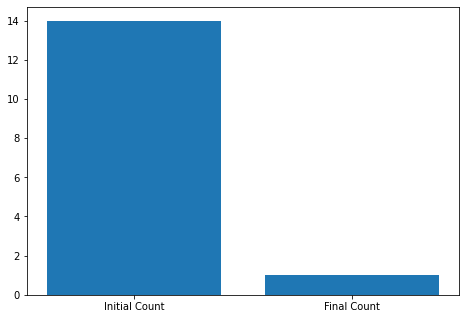

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
numb = ['Initial Count','Final Count']
no_cnt = [count, changed_count]
ax.bar(numb, no_cnt)
plt.show()


In [8]:
import pandas as pd

In [9]:
frame1 = {'Virus File Name': [file_name], 'Virus_SHA_ID': [sha256_id],
         'No. of Vendors flagged': [count]
         }
frame2 = {'Changed Virus File Name': [edited_file], 'Virus_new_SHA_ID': [sha256_id_new],
          'No. of Vendors flagged again': [changed_count]}
print(frame1)
print()
print(frame2)


{'Virus File Name': ['vfile_91'], 'Virus_SHA_ID': ['818478c70123256b6bc5d97db379a4e02b5aa6977493f57f670f3b32ea2e6a6c'], 'No. of Vendors flagged': [14]}

{'Changed Virus File Name': ['vfile_91_ch_allrmved'], 'Virus_new_SHA_ID': ['bea5340bef253fde7f6c766542dd9f0ecc19ca77b9781a0ad706dd251958053a'], 'No. of Vendors flagged again': [1]}


In [12]:
frame3 = {'No. of Vendors flagged': [count], 'No. of Vendors flagged again': [changed_count]}

df3 = pd.DataFrame(frame3)
print(df3)

   No. of Vendors flagged  No. of Vendors flagged again
0                      14                             1


In [10]:
df1 = pd.DataFrame(frame1)
df2 = pd.DataFrame(frame2)
print(df1)
print(df2)


  Virus File Name                                       Virus_SHA_ID  \
0        vfile_91  818478c70123256b6bc5d97db379a4e02b5aa6977493f5...   

   No. of Vendors flagged  
0                      14  
  Changed Virus File Name                                   Virus_new_SHA_ID  \
0    vfile_91_ch_allrmved  bea5340bef253fde7f6c766542dd9f0ecc19ca77b9781a...   

   No. of Vendors flagged again  
0                             1  


In [13]:
df1.to_csv('DataFrame_initial.csv', index=False)
df2.to_csv('DataFrame_final.csv', index=False)
df3.to_csv('DF_combined.csv', index=False)

In [ ]:
# df01 = pd.read_csv('DataFrame_initial.csv', index_col=False)
# df02 = pd.read_csv('DataFrame_final.csv', index_col=False)


In [ ]:
# print(df01._get_value(0, 'No. of Vendors flagged'))
# print(df02._get_value(0, 'No. of Vendors flagged again'))

In [ ]:
import shutil
import os

In [ ]:
if upload_option == "Folder" or upload_option == "folder" :
    os.listdir('../Viruses_to_check/Virus_Folder')            # To list files in folder

    if not os.path.exists('Virus_changed1_Folder'):
        os.mkdir('Virus_changed1_Folder')
    if not os.path.exists('Virus_changed2_Folder'):
        os.mkdir('Virus_changed2_Folder')

    virus_list = []
    virus_sha_list = []
    virus_vendor_count = []
    virus_new_list = []
    virus_new_sha_list = []
    virus_new_vendor_count = []

    for file in os.listdir('../Viruses_to_check/Virus_Folder'):

        obj = VT(api_key)
        file_name = file
        virus_list.append(file_name)
        obj.upload_file(file_name)

        sha256_id = obj.upload_file(file_name)['sha256']
        virus_sha_list.append(sha256_id)

        count = obj.get_report(sha256_id)
        # print(count)
        virus_vendor_count.append(count)


    print(virus_list)
    print(virus_sha_list)
    print(virus_vendor_count)

    

In [ ]:
if upload_option == "Folder" or upload_option == "folder":

    for file in os.listdir('../Viruses_to_check/Virus_Folder'):
        edited_file = rmv_js.remove_javascript(file, upload_option)
        # print(edited_file)
        # print(type(edited_file))
        new_edit_file = os.path.basename(edited_file)
        # print(new_edit_file)
        
        fil_src = '../Viruses_to_check/Virus_Folder/' + new_edit_file
        fil_dst = '../Viruses_to_check/Virus_changed1_Folder'
        shutil.move(fil_src, fil_dst)
    
    for file in os.listdir('../Viruses_to_check/Virus_changed1_Folder'):
            # print(file)
        new_edit_file = rmv_hl.remove_hyperlinks(file, upload_option)
        # print(new_edit_file)

        fil_src = '../Viruses_to_check/' + new_edit_file
        fil_dst = '../Viruses_to_check/Virus_changed2_Folder'
        shutil.move(fil_src, fil_dst)
    
    for file in os.listdir('../Viruses_to_check/Virus_changed2_Folder'):
        # print(file)
        virus_new_list.append(file)

        obj.upload_file_again(file)

        sha256_id_new = obj.upload_file_again(file)['sha256']
        virus_new_sha_list.append(sha256_id_new)

        new_count = obj.get_report(sha256_id_new)
        virus_new_vendor_count.append(new_count)

    print(virus_new_list)
    print(virus_new_sha_list)
    print(virus_new_vendor_count)


# Converting the Data Recieved into DataFrame


In [ ]:
import pandas as pd

In [ ]:
frame = {'Virus File Name': virus_list, 'Virus_SHA_ID': virus_sha_list,
         'Number of Vendors flagged': virus_vendor_count , 
         'Changed Virus File Name': virus_new_list, 'Virus_new_SHA_ID': virus_new_sha_list,
         'Number of Vendors flagged again' : virus_new_vendor_count }
print(frame)

In [ ]:
df = pd.DataFrame(frame)
print(df)

In [ ]:
df.to_csv('DataFrames.csv')